In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
force_files = glob.glob('**/*forceCoeffs.dat', recursive=True)

In [3]:
#for file in force_files:
#    print(file)

In [4]:
df = pd.DataFrame()
for f in force_files:
    aoa = int(f.split('/')[0].replace('AoA_',''))
    # Read the header first (line starting with "#")
    with open(f) as fh:
        header = None
        for line in fh:
            if line.startswith("# Time"):
                header = line.lstrip("#").strip().split()
                break
    
    if header is None:
        continue  # skip if no header found

    # Load data into dataframe
    data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
    data['aoa'] = aoa
    df = pd.concat([df, data], axis=0)

/tmp/ipykernel_13831/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_13831/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_13831/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_13831/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=

In [5]:
df2 = df[df.Time==500].sort_values(by='aoa').reset_index(drop=True)

In [6]:
df2

,Time,Cm,Cd,Cl,Cl(f),Cl(r),aoa
0,500,0.170220,0.500613,-0.819949,-0.239755,-0.580195,-30
1,500,0.126048,0.297051,-0.744905,-0.246404,-0.498501,-20
2,500,0.090373,0.113072,-0.577240,-0.198247,-0.378992,-10
3,500,0.062512,0.076405,-0.447781,-0.161379,-0.286403,-8
4,500,0.040157,0.051944,-0.322435,-0.121060,-0.201375,-6
5,500,0.024389,0.034482,-0.197907,-0.074565,-0.123342,-4
6,500,-0.002482,0.024229,-0.049429,-0.027196,-0.022233,-2
7,500,-0.017878,0.020591,0.074875,0.019560,0.055315,0
8,500,-0.038207,0.022868,0.209950,0.066768,0.143181,2
9,500,-0.067673,0.030828,0.364001,0.114327,0.249674,4


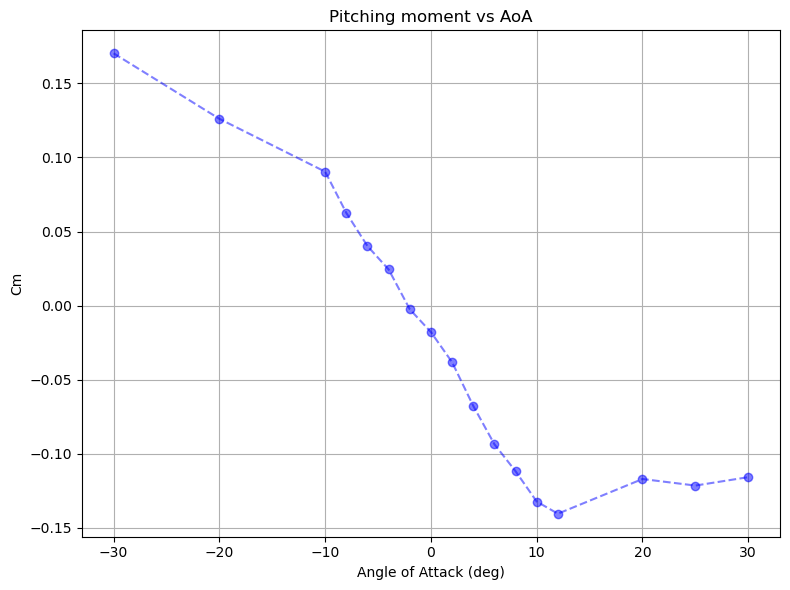

In [7]:
fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["aoa"], df2["Cm"], 'o--', color='blue', alpha=0.5, label="Cm")

ax1.set_xlabel("Angle of Attack (deg)")
ax1.set_ylabel("Cm", color='black')
ax1.grid(True)

# Optional: combine legends from both axes
#lines1, labels1 = ax1.get_legend_handles_labels()

# --- Secondary y-axis: Cl/Cd ---
#ax2 = ax1.twinx()
#ax2.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.7, label="Cl / Cd")
#ax2.set_ylabel("Cl / Cd", color='red')

# Combine legends
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

plt.title("Pitching moment vs AoA")
plt.tight_layout()
plt.show()


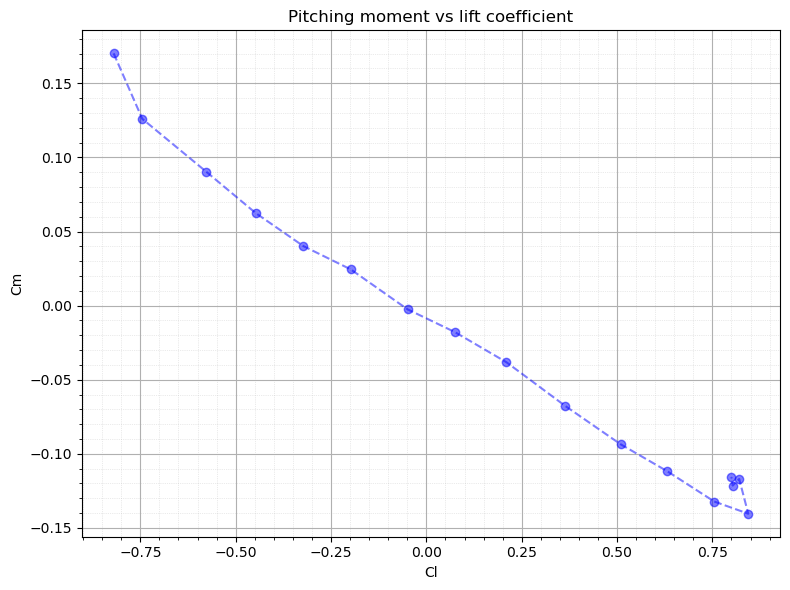

In [12]:
fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["Cl"], df2["Cm"], 'o--', color='blue', alpha=0.5, label="Cm")

ax1.set_xlabel("Cl")
ax1.set_ylabel("Cm", color='black')

ax1.grid(True)
ax1.minorticks_on()
ax1.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

plt.title("Pitching moment vs lift coefficient")
plt.tight_layout()
plt.show()


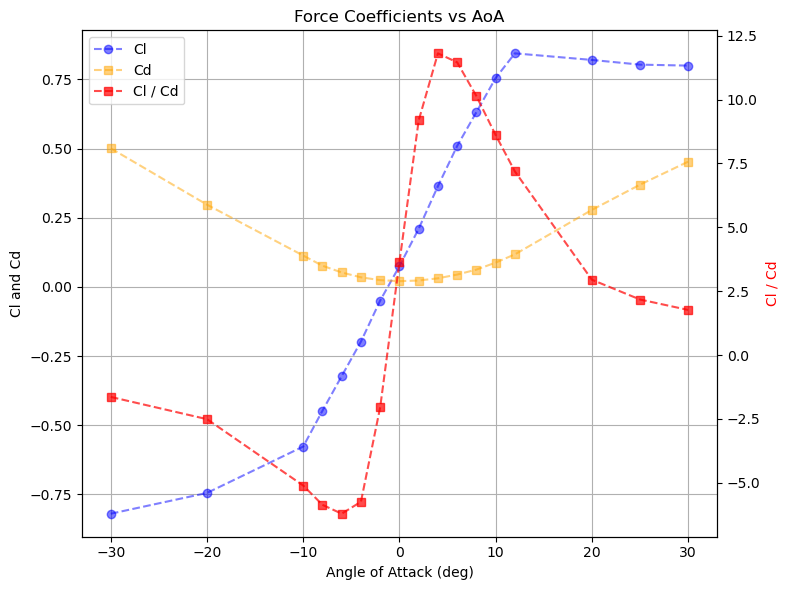

In [8]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["aoa"], df2["Cl"], 'o--', color='blue', alpha=0.5, label="Cl")
ax1.plot(df2["aoa"], df2["Cd"], 's--', color='orange', alpha=0.5, label="Cd")
#ax1.plot(df2["aoa"], df2["Cm_last"], '^--', color='green', alpha=0.5, label="Cm (last)")

ax1.set_xlabel("Angle of Attack (deg)")
ax1.set_ylabel("Cl and Cd", color='black')  # main axis label
ax1.grid(True)

# Optional: combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()

# --- Secondary y-axis: Cl/Cd ---
ax2 = ax1.twinx()
ax2.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.7, label="Cl / Cd")
ax2.set_ylabel("Cl / Cd", color='red')

# Combine legends
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

plt.title("Force Coefficients vs AoA")
plt.tight_layout()
plt.show()
